# Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.
Label Encoding and Ordinal Encoding are both methods used to convert categorical data into numerical values that machine learning models can work with. However, they are applied in slightly different scenarios and have distinct characteristics:

1. **Label Encoding:**
Label Encoding involves assigning a unique integer value to each category in a categorical variable. It is often used when the categories don't have a specific order or ranking among them. For instance, if you have a categorical variable "Color" with categories "Red," "Blue," and "Green," label encoding could assign them values like 0, 1, and 2.

Example:

In [1]:
from sklearn.preprocessing import LabelEncoder

color_data = ['Red', 'Blue', 'Green', 'Red', 'Blue']
label_encoder = LabelEncoder()
encoded_colors = label_encoder.fit_transform(color_data)
print(encoded_colors)  # Output: [2, 0, 1, 2, 0]

[2 0 1 2 0]


2. **Ordinal Encoding**
Ordinal Encoding is used when there is an inherent order or ranking among the categories. In this method, each category is assigned a numerical value based on its order/rank. This can be useful for variables like education levels (e.g., High School < Bachelor's < Master's < PhD) or economic status (e.g., Low < Medium < High).

Example:

In [2]:
education_levels = ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']
ordinal_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
ordinal_encoded_education = [ordinal_mapping[level] for level in education_levels]
print(ordinal_encoded_education)  # Output: [1, 2, 3, 4, 2]

[1, 2, 3, 4, 2]


**When to choose one over the other:**

Label Encoding: Use this when the categorical variable has no inherent order or ranking. Label Encoding is simple to implement and can be used for features where the order doesn't matter. However, be cautious when using it with algorithms that might interpret the numerical values as having a meaningful relationship, which could lead to incorrect results.

Ordinal Encoding: Choose this when there is a clear order or ranking among the categories. This method preserves the ordinal relationship between categories, making it suitable for situations where the order matters, such as education levels, socio-economic status, or levels of satisfaction.

**Always consider the nature of your data and the requirements of your model when deciding between Label Encoding and Ordinal Encoding.**

# Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.
Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [3]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


# Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?
**Covariance**
It indicate the relationship of two veriables. If an increase in one variable results ni increase in another, both variables are said to have a positive covariance. If increase in one vaeriable causes decrease in another veriable the such relationship have a negative covariance.

Covariance is important in statistical analysis for several reasons:
- **Relationship Assessment:** Covariance helps determine whether two variables are positively, negatively, or not correlated at all. This information is crucial for understanding how changes in one variable might be associated with changes in another, and whether there's a predictable pattern.

- **Dimensionality Reduction:** In multivariate analysis, understanding covariance can help identify variables that are strongly related. This information can be used to reduce the dimensionality of the dataset by retaining only the most informative variables.

- **Portfolio Management:** In finance, covariance is used to understand how the returns of different assets in a portfolio move together. Low covariance between assets can help diversify risk.

- **Feature Selection:** In machine learning, covariance can assist in feature selection by identifying features that have a strong relationship with the target variable, which can lead to more effective models.


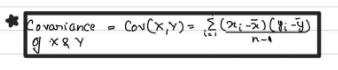

# Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Sample data
data = [
    ['red', 'small', 'wood'],
    ['green', 'medium', 'metal'],
    ['blue', 'large', 'plastic'],
    ['green', 'small', 'metal'],
    ['red', 'medium', 'wood']
]
df = pd.DataFrame(data,columns=['Color','Size','Material'])

#creating instances
color_encoder = LabelEncoder()
size_encoder = LabelEncoder()
Material_encoder = LabelEncoder()

#fit-transform
encoded_color = pd.DataFrame(color_encoder.fit_transform(df[['Color']]),columns=['Color_encoded'])
encoded_size = pd.DataFrame(color_encoder.fit_transform(df[['Size']]),columns=['Size_encoded'])
encoded_Material = pd.DataFrame(color_encoder.fit_transform(df[['Material']]),columns=['Material_encoded'])
encoded = pd.concat([encoded_color,encoded_size,encoded_Material],axis=1)

df = pd.concat([df,encoded],axis=1)
df

/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/asit/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Color,Size,Material,Color_encoded,Size_encoded,Material_encoded
0,red,small,wood,2,2,2
1,green,medium,metal,1,1,0
2,blue,large,plastic,0,0,1
3,green,small,metal,1,2,0
4,red,medium,wood,2,1,2


In [28]:
import numpy as np

# Sample data
age_data = [30, 25, 40, 35, 28]
income_data = [50000, 60000, 75000, 55000, 70000]
education_data = [3, 2, 4, 3, 2]  # Assume education level is encoded as: 1=High School, 2=Bachelor, 3=Master, 4=PhD

df = pd.DataFrame({
    'age_data': age_data,
    'income_data': income_data,
    'education_data': education_data
})
df.cov()

,age_data,income_data,education_data
age_data,35.30,22250.0,4.65
income_data,22250.00,107500000.0,1750.00
education_data,4.65,1750.0,0.70


# Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?
or the given categorical variables "Gender," "Education Level," and "Employment Status," here's the encoding method I would recommend for each variable:

1. **Gender (Binary Variable):**
Since "Gender" has only two categories ("Male" and "Female"), you can use Label Encoding or a simple mapping to convert it into numerical values. You can assign 0 for "Male" and 1 for "Female." Label Encoding is suitable here because there's no inherent order between the two genders.

In [30]:
from sklearn.preprocessing import LabelEncoder

gender_data = ['Male', 'Female', 'Male', 'Female']
label_encoder = LabelEncoder()
encoded_gender = label_encoder.fit_transform(gender_data)
encoded_gender

array([1, 0, 1, 0])

2. **Education Level (Ordinal Variable):**
"Education Level" has a clear ordinal relationship (High School < Bachelor's < Master's < PhD). Therefore, you should use Ordinal Encoding to preserve the order of the categories.

In [31]:
education_levels = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD', 'Bachelor\'s']
ordinal_mapping = {'High School': 1, 'Bachelor\'s': 2, 'Master\'s': 3, 'PhD': 4}
ordinal_encoded_education = [ordinal_mapping[level] for level in education_levels]
ordinal_encoded_education

[1, 2, 3, 4, 2]

3. **Employment Status (Nominal Variable):**
"Employment Status" does not have a clear order or ranking among categories, so you should use One-Hot Encoding (also known as dummy encoding) to create binary columns for each category. This method ensures that the model doesn't interpret any numerical relationships between the categories.

In [32]:
import pandas as pd

employment_data = ['Unemployed', 'Part-Time', 'Full-Time', 'Part-Time']
employment_encoded = pd.get_dummies(employment_data, prefix='Employment')
employment_encoded

,Employment_Full-Time,Employment_Part-Time,Employment_Unemployed
0,False,False,True
1,False,True,False
2,True,False,False
3,False,True,False


# Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/ East/West). Calculate the covariance between each pair of variables and interpret the results.

In [40]:
# sample data
temperature_data = [25, 28, 22, 30, 26]
humidity_data = [60, 70, 55, 75, 62]
wind_dir = ['North','South','East','West','East']
weather_condition = ['Sunny','Rainy','Sonny','Sonny','Cloudy']

df = pd.DataFrame({
    'temperature_data':temperature_data,
    'humidity_data':humidity_data,
    'wind_dir':wind_dir,
    'weather_condition':weather_condition
})
winddir_encod = LabelEncoder()
weathercon_encode = LabelEncoder()
df['wind_dir'] = pd.DataFrame(winddir_encod.fit_transform(df['wind_dir']))
df['weather_condition'] = pd.DataFrame(weathercon_encode.fit_transform(df['weather_condition']))
df.cov()

,temperature_data,humidity_data,wind_dir,weather_condition
temperature_data,9.20,23.90,3.45,-0.65
humidity_data,23.90,64.30,9.65,-1.30
wind_dir,3.45,9.65,1.70,0.35
weather_condition,-0.65,-1.30,0.35,1.30
